<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_19_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
print(type(train_images))
print(train_images.dtype)
print(train_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)
(10000,)


#### EDA(Exploratory Data Analysis)
- 본격적으로 분석하기 전 데이터 훑어 보기

In [ ]:
print(len(train_labels))
train_labels

60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[40]

In [ ]:
print(type(digit))
# digit

<class 'numpy.ndarray'>


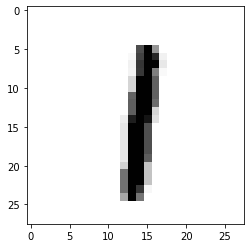

In [ ]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 데이터 전처리

In [ ]:
# 학습 데이터를 2차원에서 1차원으로 28*28 - > 784
train_images = train_images.reshape((60000,28*28))

# <전처리> uint8 -> float32 타입 바꾸기(0->0.0)
train_images = train_images.astype('float32')/255
# 데이터가 0~255로 되어 있는데 255 나누기 때문에 255는 1이 됨
# 즉, 0~1 사이 값으로 바뀜

In [ ]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

---

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# 원-핫인코딩으로 바꾸기(One-Hot Encoding:수많은 0과 한개의 1의 값으로 데이터를 구별하는 인코딩)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### 모델링

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

- 옵티마이저: 손실 함수을 통해 얻은 손실값으로부터 모델을 업데이트하는 방식을 의미
  - TensorFlow는 SGD, Adam, RMSprop과 같은 다양한 종류의 옵티마이저를 제공

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # input_shape=(28*28,):: 앞부분에 데이타가 몇 개가 들어 올 것이다 알려줌. 그래서 중간 레이어는 input_shape 설정 X
network.add(layers.Dense(10, activation='softmax')) # 중간 레이어니까 input_shape 설정 X
# softmax :: ~가 ~일 확률(숫자)로 바꿔줌
network.compile(
    optimizer='rmsprop', # 잘 모르면 rmsprop 또는 adam 써라
    loss='categorical_crossentropy', # 0~9까지 맞추는 분류 모델이니까 "categorical_crossentropy" 쓰는 거임(다중분류일때 쓰임)
    # 이진 분류(T or F)일 때 "binary_crossentropy"
    metrics=['accuracy']
)

In [ ]:
# train_images: 이미지 6만 개
# train_labels: train_images가 뭘 의미하는지 담겨있는 것 --- len(train_labels) :: 60000
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2531 - accuracy: 0.9272
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1026 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0496 - accuracy: 0.9855
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9821
test_acc:  0.9821000099182129




---



---



In [ ]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

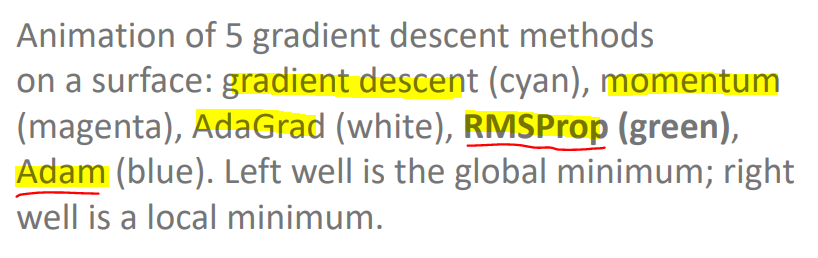

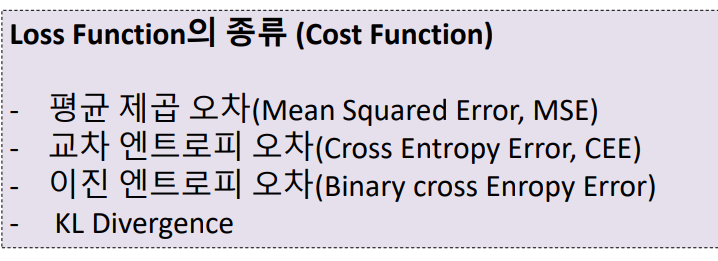